In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable (house prices)
df["Price"] = data.target

# Display first five rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [3]:
# Split dataset into features (X) and target (y)
X = df.drop("Price", axis=1)  # Features
y = df["Price"]  # Target

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 16512
Testing samples: 4128


In [4]:
# Create Random Forest model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Model Trained Successfully!")

Random Forest Model Trained Successfully!


In [5]:
# Predict house prices on test data
y_pred = rf_model.predict(X_test)

# Show first 10 predictions vs actual values
results = pd.DataFrame({"Actual Price": y_test[:10].values, "Predicted Price": y_pred[:10]})
print(results)

   Actual Price  Predicted Price
0       0.47700         0.509450
1       0.45800         0.745050
2       5.00001         4.923257
3       2.18600         2.528460
4       2.78000         2.279030
5       1.58700         1.643100
6       1.98200         2.378590
7       1.57500         1.668990
8       3.40000         2.776051
9       4.46600         4.909369


In [6]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score (closer to 1 is better)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.2556
R² Score: 0.8050


C:\Users\navin\AppData\Local\Temp\ipykernel_26480\628774767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


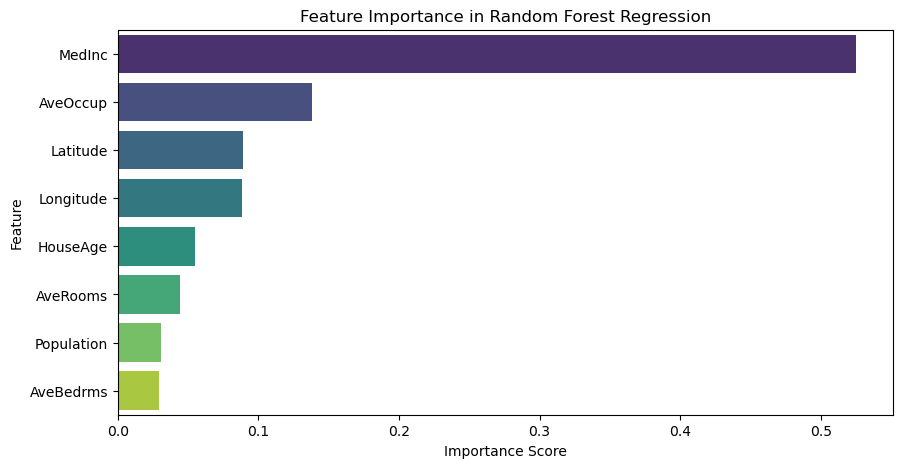

In [7]:
# Extract feature importance
feature_importance = rf_model.feature_importances_

# Convert to DataFrame
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Regression")
plt.show()